In [1]:
import numpy as np
import pandas as pa
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
titanic_df=pa.read_csv("titanic_data.csv")

In [3]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Investigate Age Factor
first get the valid data

In [4]:
non_aged=titanic_df[titanic_df['Age'].isnull()]

In [5]:
aged_people=titanic_df[~titanic_df['Age'].isnull()]

In [6]:
aged_survived=aged_people.groupby("Survived")

Survived
0    Axes(0.125,0.125;0.775x0.775)
1    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

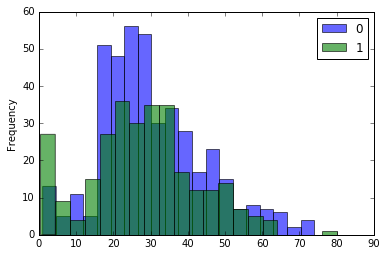

In [7]:
aged_survived["Age"].plot(kind='hist',bins=20,alpha=0.6,legend=True)

In [8]:
aged_survived["Age"].describe()

Survived       
0         count    424.000000
          mean      30.626179
          std       14.172110
          min        1.000000
          25%       21.000000
          50%       28.000000
          75%       39.000000
          max       74.000000
1         count    290.000000
          mean      28.343690
          std       14.950952
          min        0.420000
          25%       19.000000
          50%       28.000000
          75%       36.000000
          max       80.000000
dtype: float64

# Investigate Gender Factor

In [9]:
survived_grouped=titanic_df.groupby("Survived")

In [10]:
sex_survived=titanic_df.groupby("Sex")

In [11]:
females=sex_survived.get_group("female")
males=sex_survived.get_group("male")

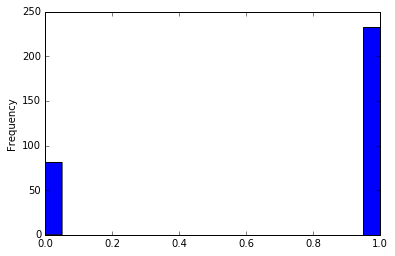

In [12]:
females["Survived"].plot.hist(bins=20)

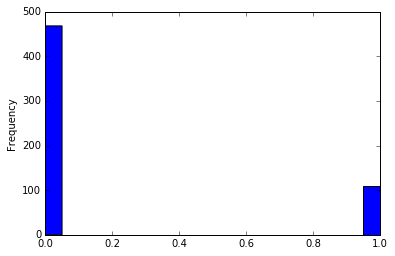

In [13]:
males["Survived"].plot.hist(bins=20)

In [14]:
males.sum()["Survived"]

109.0

In [15]:
females.sum()["Survived"]

233.0

In [18]:
females.describe()["Survived"]

count    314.000000
mean       0.742038
std        0.438211
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [19]:
males.describe()["Survived"]

count    577.000000
mean       0.188908
std        0.391775
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Survived, dtype: float64

# Investigate Embarked Factor

In [20]:
valid_embarked=titanic_df[~titanic_df["Embarked"].isnull()]

In [21]:
len(valid_embarked)

889

In [22]:
Embarked=valid_embarked.groupby("Embarked")

In [23]:
Embarked.describe()

Age        Fare       Parch  PassengerId      Pclass  \
Embarked                                                                      
C        count  130.000000  168.000000  168.000000   168.000000  168.000000   
         mean    30.814769   59.954144    0.363095   445.357143    1.886905   
         std     15.434860   83.912994    0.660481   259.454201    0.944100   
         min      0.420000    4.012500    0.000000     2.000000    1.000000   
         25%     21.250000   13.697950    0.000000   235.500000    1.000000   
         50%     29.000000   29.700000    0.000000   455.000000    1.000000   
         75%     40.000000   78.500025    1.000000   651.000000    3.000000   
         max     71.000000  512.329200    3.000000   890.000000    3.000000   
Q        count   28.000000   77.000000   77.000000    77.000000   77.000000   
         mean    28.089286   13.276030    0.168831   417.896104    2.909091   
         std     16.915396   14.188047    0.656999   253.646282    0.369274   
         min      2.000000    6.750000    0.000000     6.000000    1.000000   
         25%     17.500000    7.750000    0.000000   209.000000    3.000000   
         50%     27.000000    7.750000    0.000000   389.000000    3.000000   
         75%     34.500000   15.500000    0.000000   630.000000    3.000000   
         max     70.500000   90.000000    5.000000   891.000000    3.000000   
S        count  554.000000  644.000000  644.000000   644.000000  644.000000   
         mean    29.445397   27.079812    0.413043   449.527950    2.350932   
         std     14.143192   35.887993    0.853253   256.942044    0.789402   
         min      0.670000    0.000000    0.000000     1.000000    1.000000   
         25%     21.000000    8.050000    0.000000   225.750000    2.000000   
         50%     28.000000   13.000000    0.000000   447.500000    3.000000   
         75%     38.000000   27.900000    0.000000   673.250000    3.000000   
         max     80.000000  263.000000    6.000000   889.000000    3.000000   

                     SibSp    Survived  
Embarked                                
C        count  168.000000  168.000000  
         mean     0.386905    0.553571  
         std      0.557213    0.498608  
         min      0.000000    0.000000  
         25%      0.000000    0.000000  
         50%      0.000000    1.000000  
         75%      1.000000    1.000000  
         max      2.000000    1.000000  
Q        count   77.000000   77.000000  
         mean     0.428571    0.389610  
         std      0.979105    0.490860  
         min      0.000000    0.000000  
         25%      0.000000    0.000000  
         50%      0.000000    0.000000  
         75%      0.000000    1.000000  
         max      4.000000    1.000000  
S        count  644.000000  644.000000  
         mean     0.571429    0.336957  
         std      1.216600    0.473037  
         min      0.000000    0.000000  
         25%      0.000000    0.000000  
         50%      0.000000    0.000000  
         75%      1.000000    1.000000  
         max      8.000000    1.000000

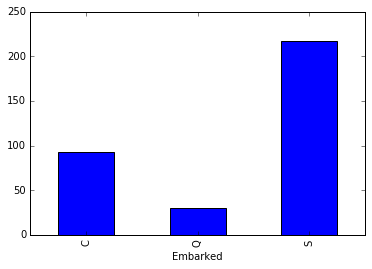

In [24]:
Embarked.sum()["Survived"].plot.bar()